In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [308]:
train_data=pd.read_csv("D:\\Kaggle\\Black Friday\\train.csv")
test_data=pd.read_csv("D:\\Kaggle\\Black Friday\\test.csv")

In [92]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [93]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [94]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [95]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [96]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [97]:
train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [98]:
train_data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [99]:
type(train_data['Occupation'][1])

numpy.int64

In [100]:
print('Train data shape:{}'.format(train_data.shape))
print('Test data shape:{}'.format(test_data.shape))

Train data shape:(550068, 12)
Test data shape:(233599, 11)


# EDA

# Univariate analysis

In [101]:
train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [102]:
train_data.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

(array([ 36844.,  57919., 132275., 104918.,  76784.,  30178.,  64558.,
         12695.,  31539.,   2358.]),
 array([1.20000e+01, 2.40690e+03, 4.80180e+03, 7.19670e+03, 9.59160e+03,
        1.19865e+04, 1.43814e+04, 1.67763e+04, 1.91712e+04, 2.15661e+04,
        2.39610e+04]),
 <a list of 10 Patch objects>)

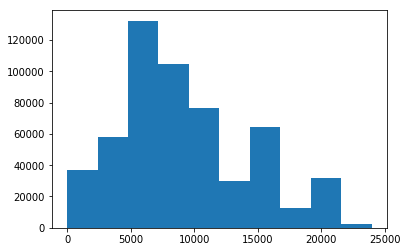

In [103]:
plt.hist(train_data['Purchase'])

In [104]:
train_data['Purchase'].skew()

0.6001400037087128

In [105]:
p=len(train_data['User_ID'].unique())
print("No of unique customers = {}".format(p))

No of unique customers = 5891


In [106]:
train_data.shape[0]

550068

In [107]:
q=len(train_data['Product_ID'].unique())
print("No of unique products = {}".format(q))

No of unique products = 3631


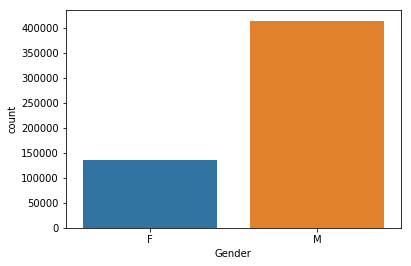

In [108]:
#GENDER
sns.countplot(train_data['Gender'])      #No of males purchasing is more

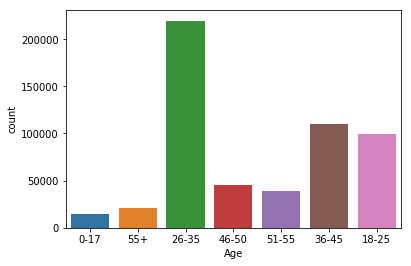

In [109]:
#AGE
sns.countplot(train_data['Age'])         #age group of 18-45 are more in numbers

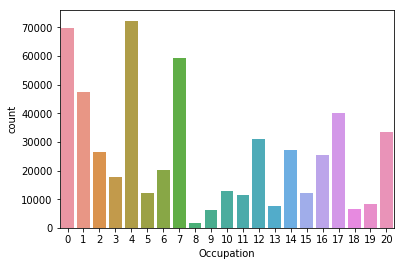

In [110]:
#OCCUPATION
sns.countplot(train_data['Occupation'])

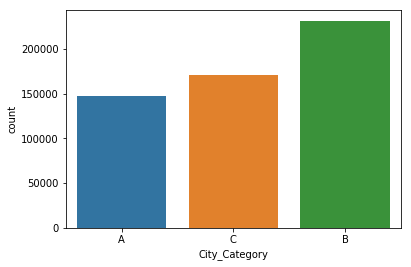

In [111]:
#CITY_CATEGORY
sns.countplot(train_data['City_Category'])

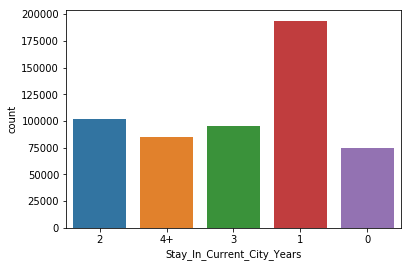

In [112]:
#Stay_In_Current_City_Years
sns.countplot(train_data['Stay_In_Current_City_Years'])  #those who just came one yr ago have a lot to purchase

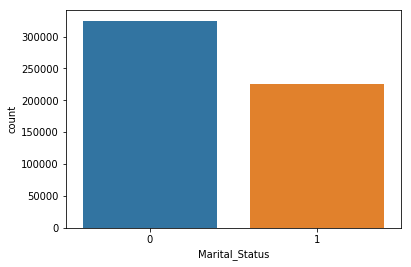

In [113]:
#MARITAL STATUS
sns.countplot(train_data['Marital_Status'])

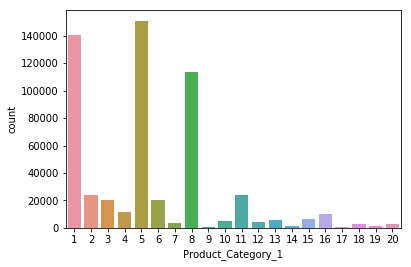

In [114]:
#Product category 1
sns.countplot(train_data['Product_Category_1'])

In [117]:
##Numerical Features
num = pd.DataFrame(train_data.select_dtypes(include=np.number))
num.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969


In [120]:
#Correlation table
cor = num.corr()
cor['Purchase']    #Purchase is not very much dependent on any variable

User_ID               0.004716
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_1   -0.343703
Product_Category_2   -0.209918
Product_Category_3   -0.022006
Purchase              1.000000
Name: Purchase, dtype: float64

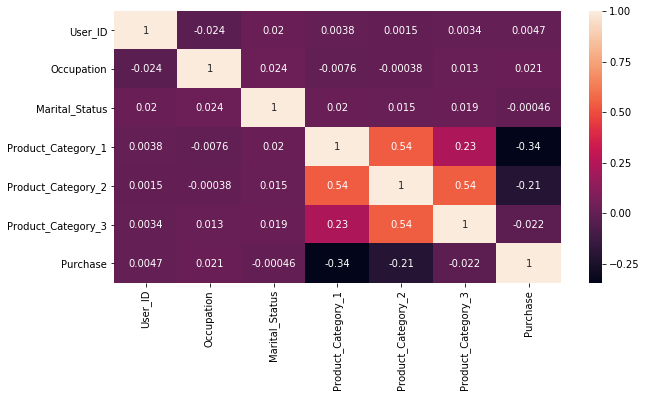

In [124]:
f, ax= plt.subplots(figsize=(10,5))
sns.heatmap(cor,annot=True,ax=ax)

# Bivariate Analysis

In [125]:
train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [126]:
train_data[['Gender','Purchase']].groupby('Gender',as_index=False).mean()

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


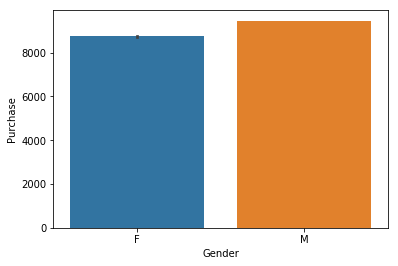

In [127]:
sns.barplot(x='Gender',y='Purchase',data=train_data)

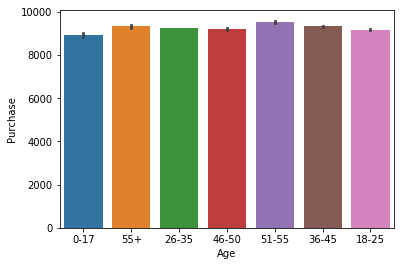

In [128]:
sns.barplot(x='Age',y='Purchase',data=train_data)     #people of age group 51-55 are spending the most

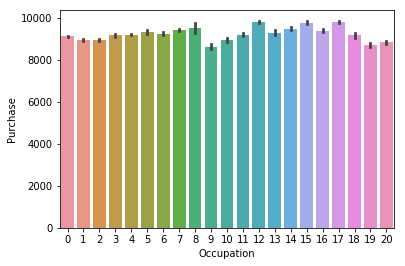

In [129]:
sns.barplot(x='Occupation',y='Purchase',data=train_data)

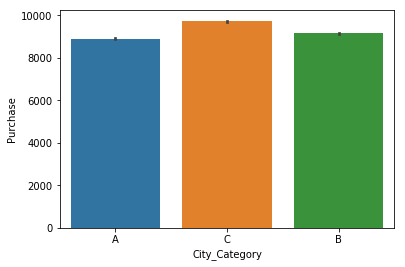

In [130]:
sns.barplot(x='City_Category',y='Purchase',data=train_data)

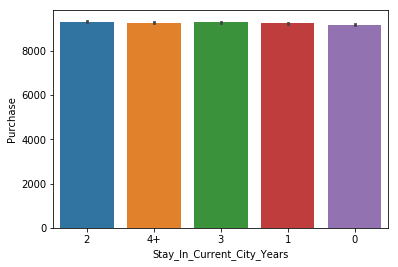

In [131]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=train_data)

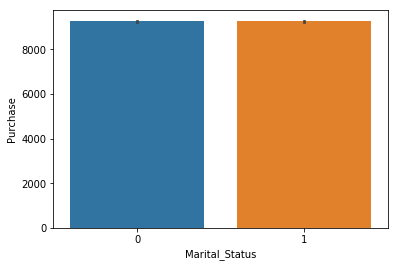

In [132]:
sns.barplot(x='Marital_Status',y='Purchase',data=train_data)

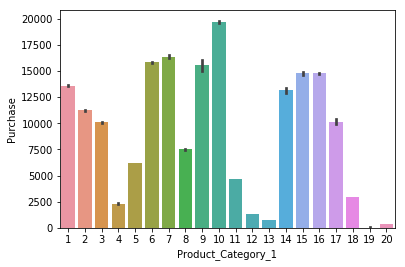

In [133]:
sns.barplot(x='Product_Category_1',y='Purchase',data=train_data)     #The purchase amount for PC 10 is the most

In [135]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Preprocessing

In [345]:
user_id=test_data['User_ID']
product_id=test_data['Product_ID']

In [309]:
train_data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [310]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [311]:
train_data['User_ID']=le.fit_transform(train_data['User_ID'])
test_data['User_ID']=le.transform(test_data['User_ID'])

In [312]:
new_product_ids = list(set(pd.unique(test_data['Product_ID'])) - set(pd.unique(train_data['Product_ID'])))

In [313]:
le = LabelEncoder()
train_data['Product_ID'] = le.fit_transform(train_data['Product_ID'])
test_data.ix[test_data['Product_ID'].isin(new_product_ids), 'Product_ID'] = -1
new_product_ids.append(-1)

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [314]:
test_data.ix[~test_data['Product_ID'].isin(new_product_ids), 'Product_ID'] = le.transform(test_data.ix[~test_data['Product_ID'].isin(new_product_ids), 'Product_ID'])

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


# Missing values

In [315]:
all_data=pd.concat([train_data.iloc[:,0:11],test_data.iloc[:,:]],ignore_index=True)

In [316]:
null = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
null.index.name='variables'
null.columns=['count']
null

,count
variables,
Product_Category_3,545809
Product_Category_2,245982
Product_Category_1,0
Marital_Status,0
Stay_In_Current_City_Years,0
City_Category,0
Occupation,0
Age,0
Gender,0


In [317]:
all_data.drop(['Product_Category_3','Product_Category_2'],axis=1,inplace=True)

In [318]:
all_data.shape

(783667, 9)

In [319]:
all_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1'],
      dtype='object')

In [320]:
all_data['Stay_In_Current_City_Years'] = all_data['Stay_In_Current_City_Years'].replace('4+','5')

In [321]:
all_data['Occupation']=all_data['Occupation'].replace([8,9,13,18,19],'P')
all_data['Occupation']=all_data['Occupation'].replace([3,5,10,11,15],'Q')
all_data['Occupation']=all_data['Occupation'].replace([2,12,6,14,16],'R')
all_data['Occupation']=all_data['Occupation'].replace([0,1,4,7,17,20],'S')

In [322]:
all_data['Stay_In_Current_City_Years'] = all_data['Stay_In_Current_City_Years'].astype('int64')
all_data['Product_ID']=all_data['Product_ID'].astype('int64')


In [323]:
data=all_data.copy()

In [324]:
train = all_data.iloc[:train_data.shape[0],:]
test=all_data.iloc[train_data.shape[0]:,:]

In [325]:
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

# Modelling

In [330]:
y=train_data['Purchase']
X=train.copy()

In [331]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.33)

In [332]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [333]:
xg.score(X_test,y_test)

0.6635249850479904

In [337]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [338]:
rf.score(X_test,y_test)

0.6973495199160744

In [339]:
y_pred=rf.predict(test)

In [346]:
sub = pd.DataFrame()
sub['User_ID']=user_id
sub['Product_ID']= product_id
sub['Purchase']=y_pred

In [348]:
sub.to_csv('D:\\Kaggle\\Black_friday.csv',index=False)